In [1]:
import pandas as pd
import numpy as np

In [2]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'

for i in encodings:
    try:
        df = pd.read_csv(file_path, encoding = i)
        print(f'File successfully read with encoding: {i}')
        break
    except UnicodeDecodeError:
        print(f'Failed to read with encoding: {i}')
        continue

if 'df' in locals():
    print('CSV file has benn successfully loaded.')
else:
    print("All encoding attempts failed, unable to read the CSV file")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has benn successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
580,ham,Huh so early.. Then Ì_ having dinner outside i...,NaN,NaN,NaN
2244,ham,No management puzzeles.,NaN,NaN,NaN
2765,ham,and picking them up from various points,NaN,NaN,NaN
2668,spam,Wanna get laid 2nite? Want real Dogging locati...,NaN,NaN,NaN
5027,ham,Go chase after her and run her over while she'...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [7]:
#data cleaning

In [8]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
df.sample(3)

,v1,v2
3090,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...
263,spam,Hey I am really horny want to chat or see me n...
2019,ham,From tomorrow onwards eve 6 to 3 work.


In [10]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [11]:
df.sample(3)

,target,text
3933,ham,How come guoyang go n tell her? Then u told her?
5406,ham,Dear are you angry i was busy dear
2864,ham,He says hi and to get your ass back to south t...


In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [13]:
df['target'] = lb.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
4224,0,\The world suffers a lot... Not because of the...
1257,0,Am also doing in cbe only. But have to pay.
3065,1,Get a brand new mobile phone by being an agent...
2890,0,"Yeah there's quite a bit left, I'll swing by t..."
5195,0,Darren was saying dat if u meeting da ge den w...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [22]:
#Exploratory Data Analysis

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

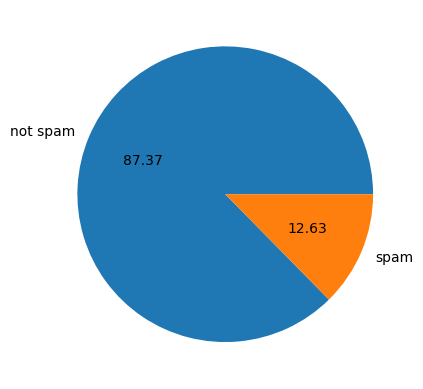

In [25]:
plt.pie(df['target'].value_counts(), labels = ['not spam', 'spam'], autopct = '%0.2f')
plt.show()

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drifo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
df['num_characters'] = df['text'].apply(len)

C:\Users\drifo\AppData\Local\Temp\ipykernel_17068\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [34]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\drifo\AppData\Local\Temp\ipykernel_17068\1296417905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\drifo\AppData\Local\Temp\ipykernel_17068\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

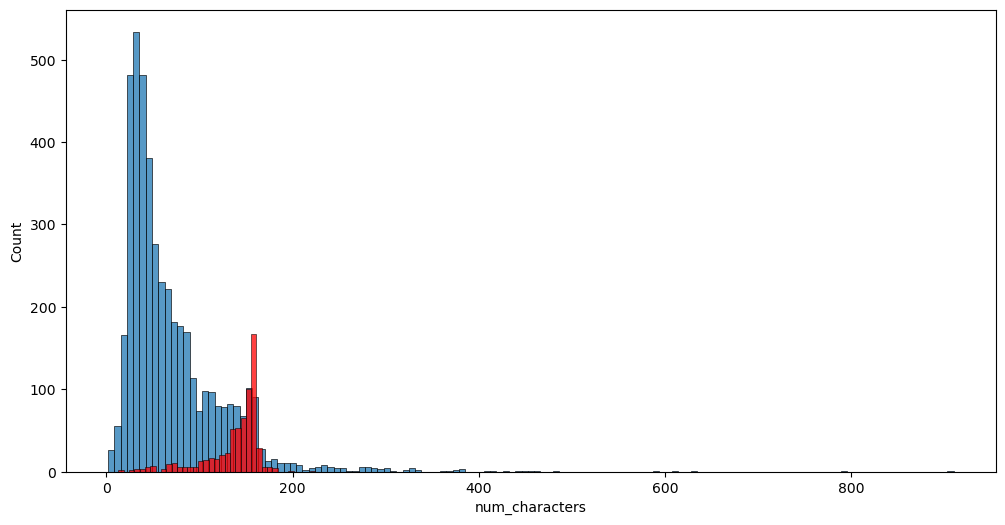

In [44]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'r')

<Axes: xlabel='num_words', ylabel='Count'>

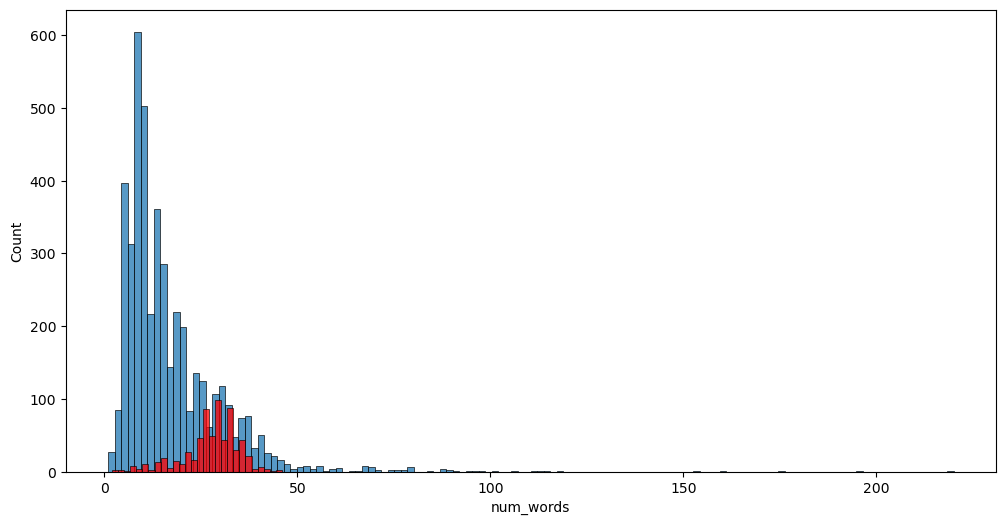

In [45]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'r')

C:\Users\drifo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


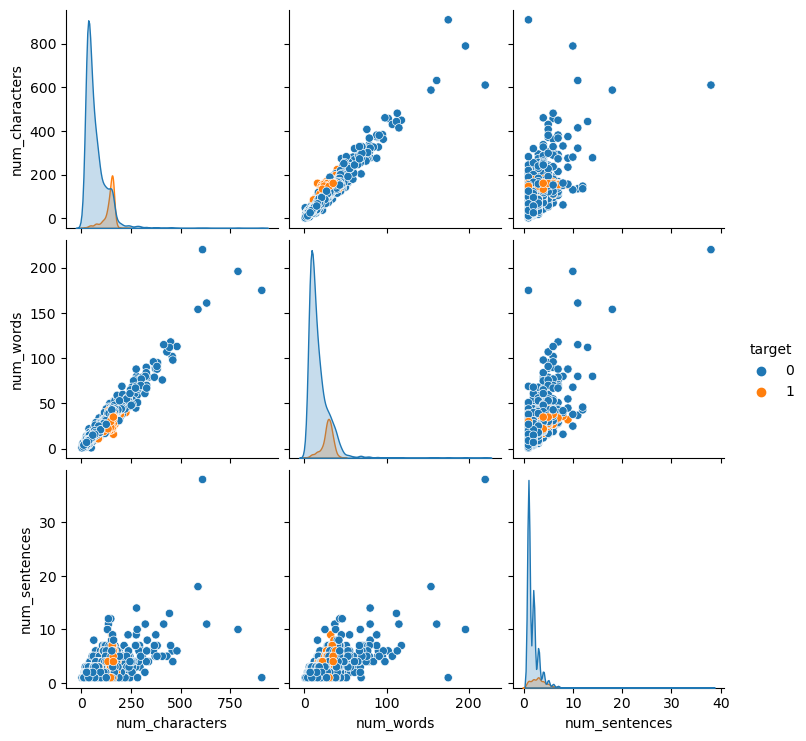

In [46]:
sns.pairplot(df, hue = 'target')

<Axes: >

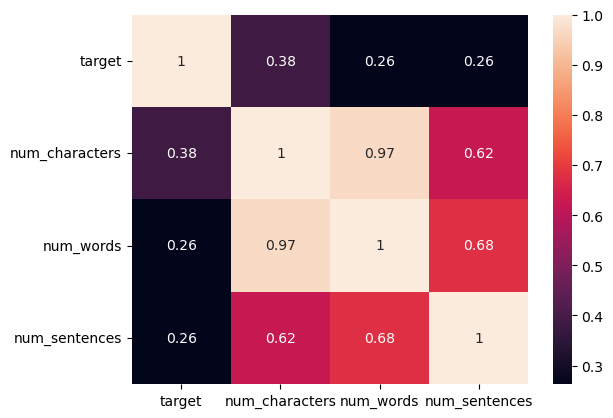

In [50]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

In [51]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drifo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
ps = PorterStemmer()

In [60]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [61]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [62]:
from nltk.stem.porter import PorterStemmer

In [63]:
ps.stem('walking')

'walk'

In [66]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\drifo\AppData\Local\Temp\ipykernel_17068\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 762.6 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 881.2 kB/s eta 0:00:00


In [74]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [75]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' ')) 

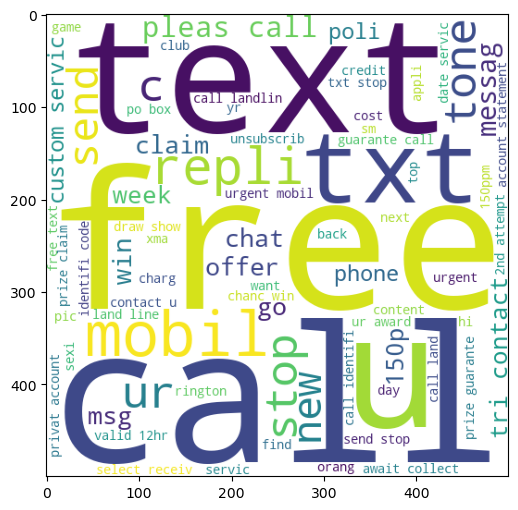

In [76]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [77]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' ')) 

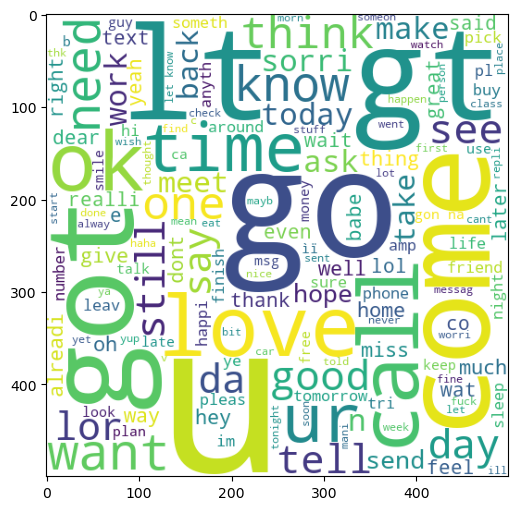

In [78]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [81]:
len(spam_corpus)

9939

In [83]:
"""from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()"""

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

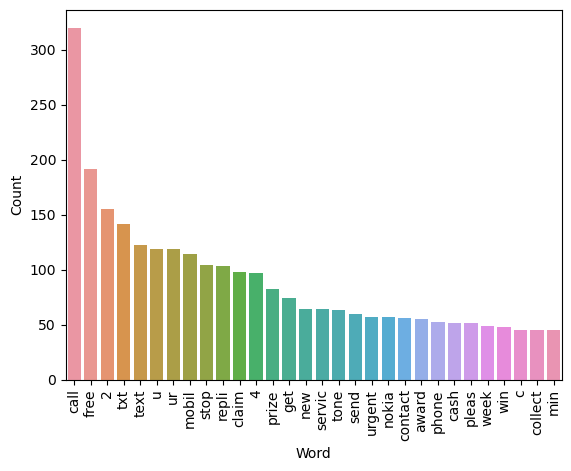

In [84]:
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [86]:
len(ham_corpus)

35404

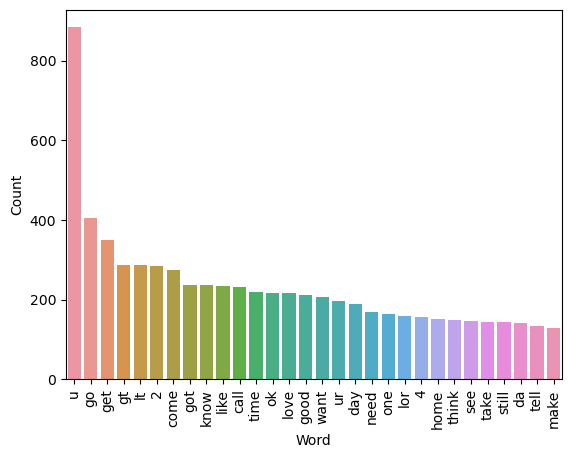

In [87]:
ham_counter = Counter(ham_corpus)
most_common_words = ham_counter.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [90]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [91]:
X.shape

(5169, 3000)

In [93]:
y = df['target'].values

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)

In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [99]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [100]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [101]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 445.2 kB/s eta 0:03:44
   ---------------------------------------- 0.1/99.8 MB 751.6 kB/s eta 0:02:13
   ---------------------------------------- 0.2/99.8 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.3/99.8 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.6/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.7/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 1.0/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 1.2/99.8 MB 2.9 MB/s eta 0:00:34
    -------------------------------

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [110]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gdbt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [111]:
clfs = {
    'SVC':svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gdbt,
    'xgb': xgb
}

In [112]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [113]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [115]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [118]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)

In [119]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [120]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [121]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\drifo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


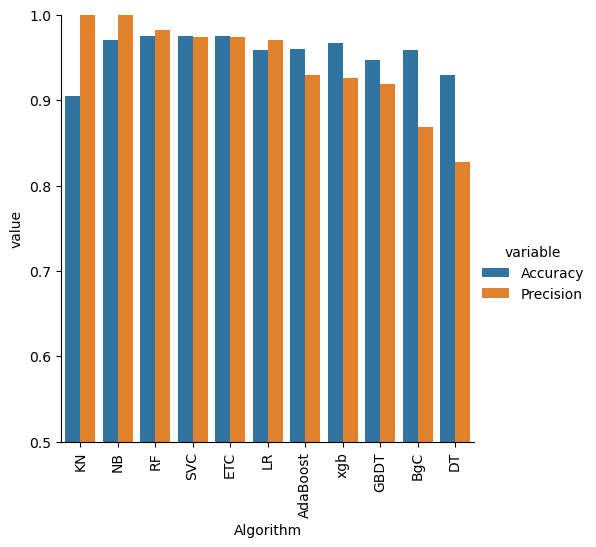

In [122]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [123]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [124]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [125]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [126]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending = False)

In [127]:
new_df_scaled.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [129]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [130]:
from sklearn.ensemble import VotingClassifier

In [132]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [133]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [134]:
y_pred = voting.predict(X_test)

In [135]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.9816247582205029
Precision:  0.9917355371900827


In [136]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [137]:
from sklearn.ensemble import StackingClassifier

In [138]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [139]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [140]:
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.9796905222437138
Precision:  0.9465648854961832


In [142]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase = True, stop_words = 'english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)